In [1]:
include("MyPyPlots.jl")
include("AuxFunctions.jl")
include("Hamiltonians.jl")
import .MyPyPlots
import .AuxFunctions
import .Hamiltonians

using DelimitedFiles
using LinearAlgebra

# Import sites and vectors

In [9]:
sites_path = "sites.txt"

dCC = 1.42028 #angstrom
uc = readdlm(sites_path, skipstart=1) #angstrom
a1 = [102.2602844238,         0.0000000000,         0.0000000000] #angstrom
a2 = [0.0000000000,         2.4599997997,         0.0000000000] #angstrom

MyPyPlots.structures2D(uc,vecs=[a1,a2],sitelabels=false,markersize=2)

# Find neighbors

In [10]:
neighbors_uc,neighbors_n1n2 = AuxFunctions.neighbors_honeycomb_2DBloch(uc,a1,a2,dNN=dCC,tol=1e-5*dCC);

MyPyPlots.structures2D(uc,neighbors=neighbors_uc,linecolors=["blue"],markersize=2,linewidth=0.2)

# Hamiltonian

In [11]:
t1 = -2.7 #eV

H2D(phi1,phi2) = Hamiltonians.TB_Bloch2D(phi1,phi2,neighbors_uc,neighbors_n1n2,hoppings=[t1])

H2D (generic function with 1 method)

In [12]:
ktest = [1.2,0.7,0] #Angstrom^(-1)

phi1 = dot(ktest,a1)
phi2 = dot(ktest,a2)

H2D(phi1,phi2)

96×96 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 192 stored entries:
⎡⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢢⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠢⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠘⠢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⎥
⎢⠢⡄⠀⠀⠀⠀⠀⠀⠀⠈⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠈⠢⣀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠣⡀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠲⡀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎦

In [13]:
ishermitian(H2D(phi1,phi2))

true

# Bands 3D

In [14]:
using Plots

function E2D(phi1, phi2, band)
    E,psi = eigen(Matrix(H2D(phi1,phi2)))
    return E[band]
end


E2D (generic function with 1 method)

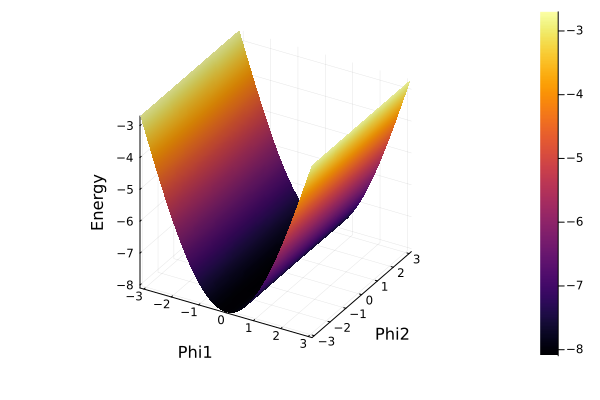

In [15]:
phi1_values = LinRange(-π, π, 100)
phi2_values = LinRange(-π, π, 100)

# Create a grid of phi1 and phi2 values
phi1_grid = repeat(phi1_values, 1, length(phi2_values))
phi2_grid = repeat(phi2_values', length(phi1_values), 1)

# Calculate H2D values for each combination of phi1 and phi2
E2D_values = [E2D.(phi1_grid, phi2_grid, band) for band in 2:3]

plot(phi1_values, phi2_values, E2D_values[1], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")
plot!(phi1_values, phi2_values, E2D_values[2], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")

In [ ]:
phi1_values = LinRange(-π, π, 100)
phi2_values = LinRange(-π, π, 100)

# Create a grid of phi1 and phi2 values
phi1_grid = repeat(phi1_values, 1, length(phi2_values))
phi2_grid = repeat(phi2_values', length(phi1_values), 1)

# Calculate H2D values for each combination of phi1 and phi2
E2D_values = [E2D.(phi1_grid, phi2_grid, band) for band in 49:50]

plot(phi1_values, phi2_values, E2D_values[1], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")
plot!(phi1_values, phi2_values, E2D_values[2], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")

In [ ]:
phi1_values = LinRange(0, 2π, 10)
phi2_values = LinRange(0, 2π, 10)

phi1_grid = repeat(phi1_values, 1, length(phi2_values))
phi2_grid = repeat(phi2_values', length(phi1_values), 1)

E2D_values = [E2D.(phi1_grid, phi2_grid, band) for band in 48:49]

plot(phi1_values, phi2_values, E2D_values[1], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")
plot!(phi1_values, phi2_values, E2D_values[2], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")

In [ ]:
phi1_values = LinRange(0, 2π, 100)  # More points for smoother plot

specific_phi2 = 0

E2D_band48 = [E2D(specific_phi2, phi2, 48) for phi2 in phi1_values]
E2D_band49 = [E2D(specific_phi2, phi2, 49) for phi2 in phi1_values]

plot(phi1_values, E2D_band48, label="Band 48", xlabel="Phi2", ylabel="Energy", title="Energy vs Phi2 for Phi1 = $specific_phi2")
plot!(phi1_values, E2D_band49, label="Band 49")


In [ ]:
phi1_values = LinRange(0, 2π, 150)  # More points for smoother plot

specific_phi2 = 3

E2D_band1 = [E2D(specific_phi2, phi2, 49) for phi2 in phi1_values]
E2D_band2 = [E2D(specific_phi2, phi2, 50) for phi2 in phi1_values]

plot(phi1_values, E2D_band1, label="Band 49", xlabel="Phi2", ylabel="Energy", title="Energy vs Phi2 for Phi1 = $specific_phi2")
plot!(phi1_values, E2D_band2, label="Band 50")


In [ ]:
# Compute the difference between the two bands
E2D_diff = E2D_band2 .- E2D_band1

# Create the plot for the difference
plot(phi1_values, E2D_diff, label="Difference (Band 50 - Band 49)", xlabel="Phi1 (radians)", ylabel="Energy Difference", title="Energy Difference vs Phi1 for Phi2 = $specific_phi2", legend=:topright)


In [ ]:
phi1_values = LinRange(0, 2π, 150)  # More points for smoother plot

specific_phi2 = 0

E2D_band1 = [E2D(specific_phi2, phi2, 49) for phi2 in phi1_values]
E2D_band2 = [E2D(specific_phi2, phi2, 50) for phi2 in phi1_values]

plot(phi1_values, E2D_band1, label="Band 49", xlabel="Phi2", ylabel="Energy", title="Energy vs Phi2 for Phi1 = $specific_phi2")
plot!(phi1_values, E2D_band2, label="Band 50")


In [ ]:
# Compute the difference between the two bands
E2D_diff = E2D_band2 .- E2D_band1

# Create the plot for the difference
plot(phi1_values, E2D_diff, label="Difference (Band 50 - Band 49)", xlabel="Phi1 (radians)", ylabel="Energy Difference", title="Energy Difference vs Phi1 for Phi2 = $specific_phi2", legend=:topright)
